In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
import sys

In [2]:
sys.path.append('../../')

In [3]:
from bertrand.pretraining.evaluate_mlm import get_last_ckpt, load_metrics_df, plot_loss

**Data from Dean et al. - 587 healthy donors, subsampled to 11M sequences**  

In [4]:
MLM_DEAN = '/mnt/storage2/olek/bertrand-rep3/pretraining/checkpoints/'

**Data from BERTrand publication - 11M sequences from immuneSim**  

In [5]:
MLM_PAPER = '/mnt/storage2/olek/bertrand-paper/pretraining/checkpoints/'

In [6]:
MLM_BIG = '/mnt/storage2/olek/bertrand-rep2/pretraining/checkpoints/'

In [7]:
def plot(metrics, eval_metrics, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(metrics.epoch, metrics.loss, label="train", c="blue")
    ax.plot(eval_metrics.epoch, eval_metrics.eval_loss, label="eval", c="green")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()

In [8]:
ckpt = get_last_ckpt(MLM_DEAN)
metrics = load_metrics_df(ckpt)

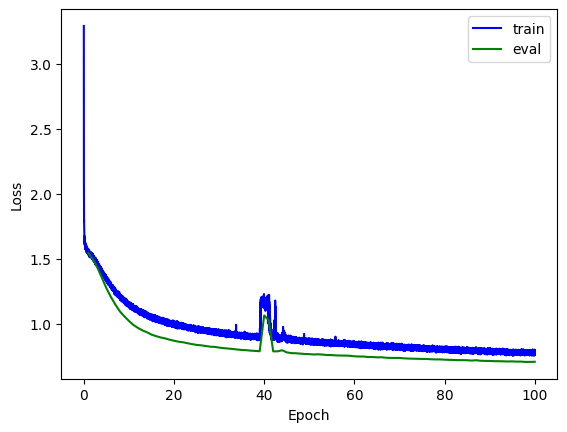

In [9]:
eval_metrics = metrics[~metrics.eval_loss.isna()].reset_index(drop=True)
plot(metrics, eval_metrics)
plt.show()

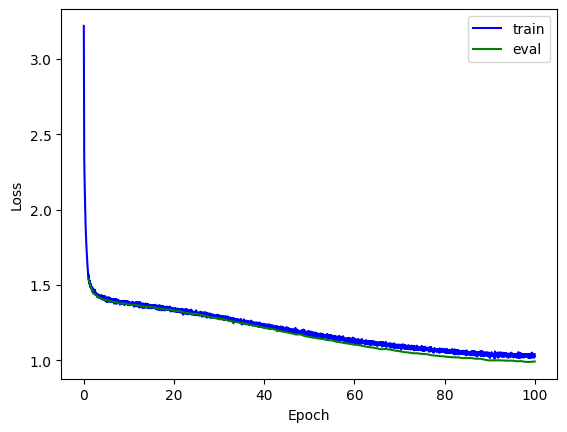

In [10]:
metrics_paper = load_metrics_df(get_last_ckpt(MLM_PAPER))
eval_metrics_paper = metrics_paper[~metrics_paper.eval_loss.isna()].reset_index(drop=True)
plot(metrics_paper, eval_metrics_paper)
plt.show()

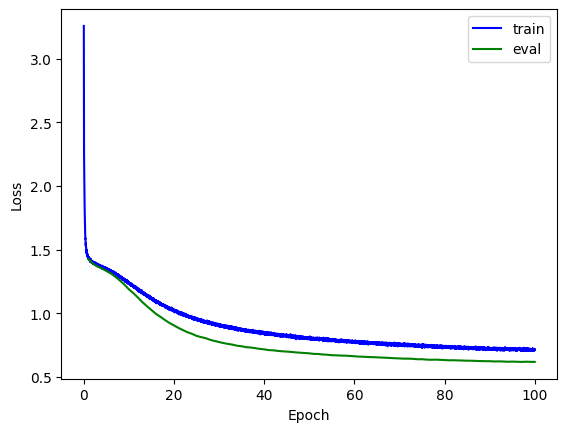

In [11]:
metrics_big = load_metrics_df(get_last_ckpt(MLM_BIG))
eval_metrics_big = metrics_big[~metrics_big.eval_loss.isna()].reset_index(drop=True)
plot(metrics_big, eval_metrics_big)
plt.show()

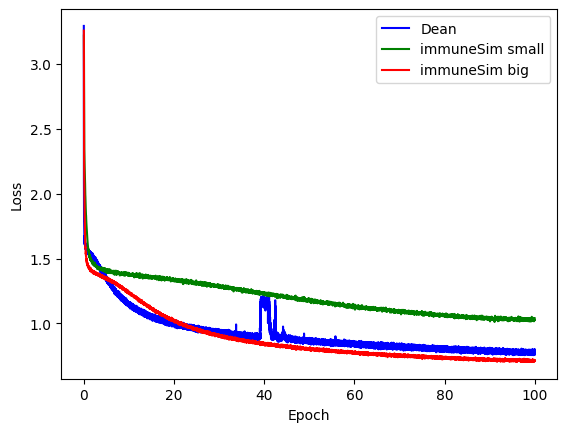

In [12]:
fig, ax = plt.subplots()
ax.plot(metrics.epoch, metrics.loss, label="Dean", c="blue")
ax.plot(metrics_paper.epoch, metrics_paper.loss, label="immuneSim small", c="green")
ax.plot(metrics_big.epoch, metrics_big.loss, label="immuneSim big", c="red")

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()
plt.show()

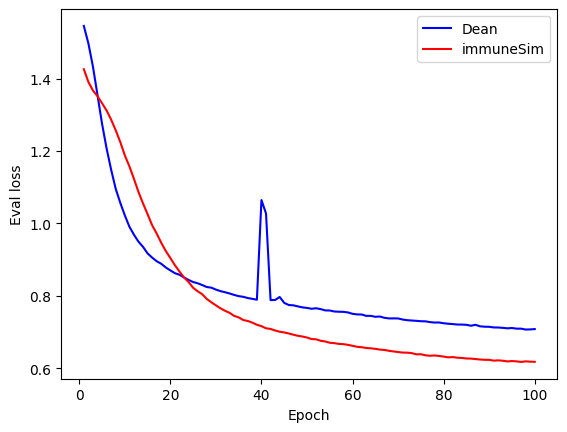

In [17]:
fig, ax = plt.subplots()
ax.plot(eval_metrics.epoch, eval_metrics.eval_loss, label="Dean", c="blue")
# ax.plot(eval_metrics_paper.epoch, eval_metrics_paper.eval_loss, label="immuneSim small", c="green")
ax.plot(eval_metrics_big.epoch, eval_metrics_big.eval_loss, label="immuneSim", c="red")

ax.set_xlabel("Epoch")
ax.set_ylabel("Eval loss")
ax.legend()
plt.show()

In [14]:
eval_metrics_big.tail(5)

,epoch,learning_rate,loss,step,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
95,96.0,NaN,NaN,1135296,0.618765,413.2672,2746.983,3.579
96,97.0,NaN,NaN,1147122,0.617204,403.3910,2814.238,3.666
97,98.0,NaN,NaN,1158948,0.618741,402.3215,2821.718,3.676
98,99.0,NaN,NaN,1170774,0.617962,404.4408,2806.933,3.657
99,100.0,NaN,NaN,1182600,0.617457,401.6079,2826.732,3.683


In [15]:
eval_metrics.tail(5)

,epoch,learning_rate,loss,step,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
95,96.0,NaN,NaN,6844320,0.709134,1169.0509,1951.514,7.623
96,97.0,NaN,NaN,6915615,0.709114,1126.8489,2024.601,7.909
97,98.0,NaN,NaN,6986910,0.706682,1123.7676,2030.152,7.930
98,99.0,NaN,NaN,7058205,0.707022,1138.3164,2004.205,7.829
99,100.0,NaN,NaN,7129500,0.707912,1168.8730,1951.811,7.624
